<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Umap and Umap plot

In [1]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     |████████████████████████████████| 15.5MB 300kB/s 
     |████████████████████████████████| 1.6MB 38.4MB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
     |████████████████████████████████| 92kB 10.0MB/s 
     |████████████████████████████████| 665kB 44.8MB/s 
     |████████████████████████████████| 102kB 11.3MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-cp36-none-any.whl size=59430 sha256=6b361ebfa4afe7c1f15932164799a169728c84aa63bfb3df4215f010a3977dd4
  Stored in directory: /root/.cache/pip/wheels/8d/06/05/c1cba3d57bdcfd3960e3f60a9fdc97e4baef2ef09af0ad1ef8
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=987e365c263d03db901873e51b669dc2cfb5262c57fba3f3a329c26d99982609
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=ce3daa3ab939bd1eb9fcd3fb718eaff1bfa469d58eefe240665c

# import all needed packages

In [9]:
import sklearn.datasets
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import pandas as pd
import umap
import umap.plot

#mnist = sklearn.datasets.fetch_openml("mnist_784")

##Import my Data

In [5]:
from pandas import read_csv
from pandas import DataFrame
import numpy as np

def load_data(filename):
  dataset = read_csv(filename, header=0);
  data = dataset.values;
  return data
def segment_data(signal, distance, overlap):
  i = 1;
  s = list()
  while int(i+distance)<len(signal):
    a = signal[int(i):int(i+distance)];
    #a = [x for x in t]
    #a = DataFrame.transpose(DataFrame(t))
    #a = np.split(a,int(distance-1)
    s.append(a)
    i = i + distance*overlap
    
  return np.asarray(s) # return a nd array
d = 70
data = load_data('drive/My Drive/InvertPhaseLong2.csv')  

ppg = segment_data(data[:,0],d,0.5)
ppg1 = segment_data(data[:,2],d,0.5)


data2 = load_data('drive/My Drive/Dataset/longcunDB2.csv') 
ppg2 = segment_data(data2[:,1],d,0.5)
ppg3 = segment_data(data2[:,0],d,0.5) # Positive with noise
s1 = ppg # convert to array
s2 = ppg1 # convert to array
s3 = ppg2 # Noise Data

## Prepare Data

In [32]:
# label for first group of Data
y1 = [-1]*s1.shape[0];
y2 = [1]*s2.shape[0];
y3 = [0]*s3.shape[0];

y1 = np.asarray(y1)
y2 = np.asarray(y2)
y3 = np.asarray(y3)
print((y1.shape, y2.shape, y3.shape))
#ydf1 = DataFrame(y1)
#ydf2 = DataFrame(y2)
# Concatenate data
X = np.concatenate((ppg, ppg1,ppg2))
y = np.concatenate((y1, y2, y3))
print(X.shape)

# rescale data
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
def scaling(signal):
  scaler = MinMaxScaler()
  s_trans = signal.transpose()
  Xscaled = scaler.fit_transform(s_trans)
  Xscaled = Xscaled.transpose()
  return Xscaled  
Xscaled = scaling(X)
Xscaled2 = scaling(ppg2)
Xscaled3 = scaling(ppg3)
#Xscaled = Xscaled.transpose()
#Xscaled2 = scaler.fit_transform(ppg2)
#print(X1T.shape)

((589,), (589,), (589,))
(1767, 70)


## Mapping Data with UMAP

In [33]:
mapper = umap.UMAP(random_state=42).fit(Xscaled)

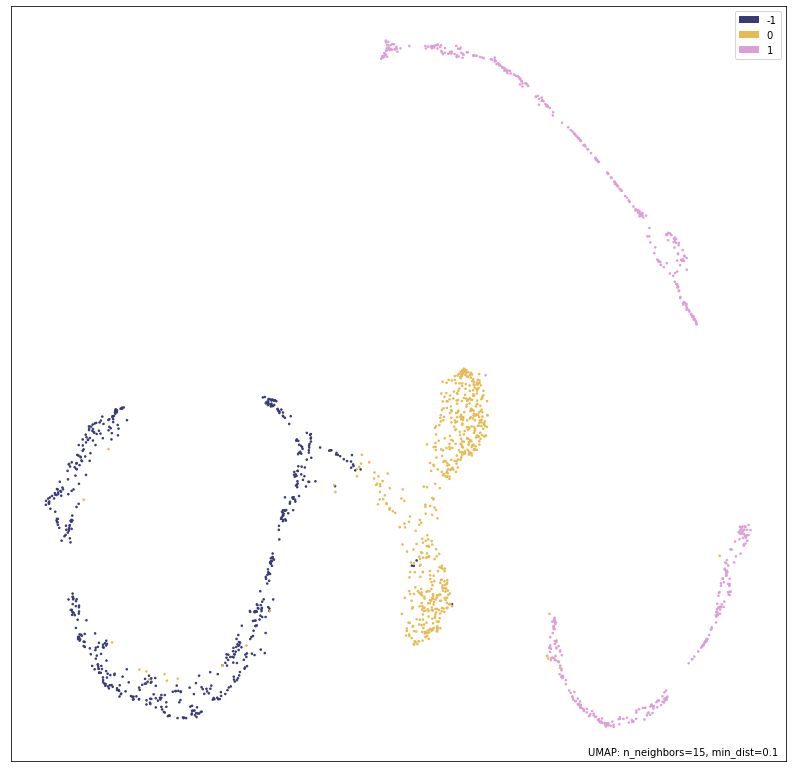

In [34]:
umap.plot.points(mapper, labels=y, width=1000, height=1000,  theme="red")